# ML Project : Sentiment Analysis in E-commerce Reviews

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from transformers import TFBertModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AnjithaRAVIKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [17]:
df = pd.read_csv('sample_reviews.csv')
df.head(10)

,review,sentiment
0,The product quality is excellent and delivery ...,1
1,I am very disappointed with the purchase,0
2,Amazing service and user-friendly website,1
3,This is the worst item I have ever bought,0
4,"I love this product, totally worth the money",1
5,"Not satisfied with the service, won’t buy again",0
6,"Great value for the price, will recommend to f...",1
7,Terrible quality and bad customer support,0
8,Very happy with the packaging and speed of del...,1
9,"Bad experience, received a damaged product",0


### Data Cleaning

In [4]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['review'].apply(clean_text)
X = df['cleaned']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Nave Bayes

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)
nb_preds = nb.predict(X_test_vect)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))



Naive Bayes Accuracy: 1.0


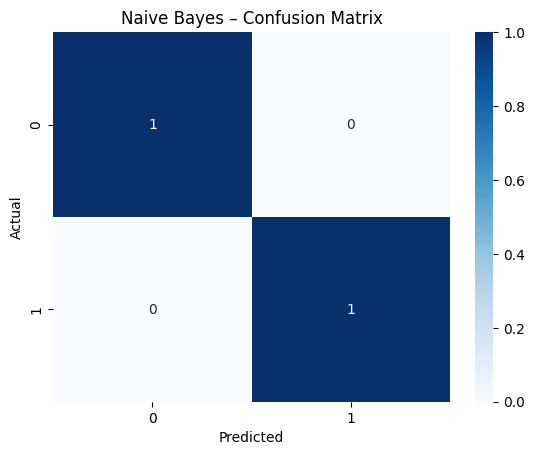

Naive Bayes – Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [6]:
# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Naive Bayes Classification Report
print("Naive Bayes – Classification Report")
print(classification_report(y_test, nb_preds))

### SVM (Support Vector Machine)

In [7]:
# SVM
svm = LinearSVC()
svm.fit(X_train_vect, y_train)
svm_preds = svm.predict(X_test_vect)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.5


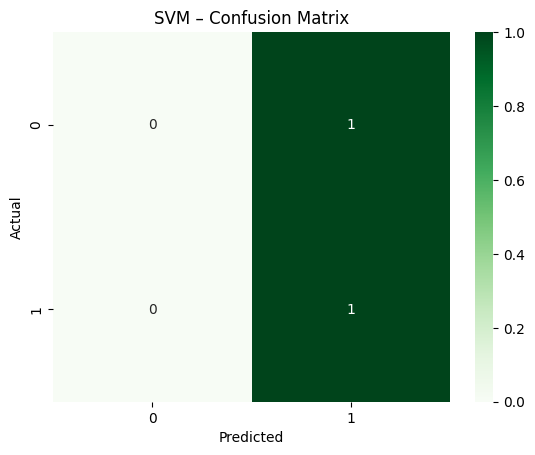

SVM – Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

In [8]:
# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_preds)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM Classification Report
print("SVM – Classification Report")
print(classification_report(y_test, svm_preds))

### LSTM (Long Short-Term Memory)

In [9]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=3, batch_size=4)

d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.2500 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5833 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9167 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.6917


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


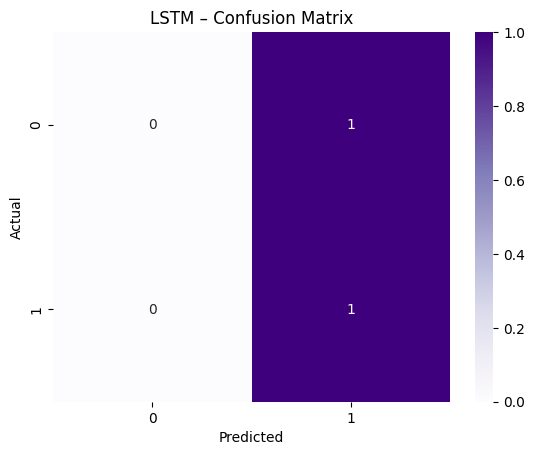

LSTM – Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

In [10]:
# Predict LSTM outputs
lstm_preds = model.predict(X_test_seq)
lstm_preds_binary = (lstm_preds > 0.5).astype("int32")

# LSTM Confusion Matrix
lstm_cm = confusion_matrix(y_test, lstm_preds_binary)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Purples')
plt.title("LSTM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LSTM Classification Report
print("LSTM – Classification Report")
print(classification_report(y_test, lstm_preds_binary))


### BERT (Bideirectional Encoder Representations from Transformers)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf

# Tokenization
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = bert_tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="tf")
test_encodings = bert_tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors="tf")

# Load BERT model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define training steps and optimizer using transformers' utility
batch_size = 4
epochs = 2
steps_per_epoch = len(X_train) // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=num_train_steps
)

# Compile the model
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
bert_model.fit(
    x=train_encodings['input_ids'],
    y=y_train,
    validation_data=(test_encodings['input_ids'], y_test),
    epochs=epochs,
    batch_size=batch_size
)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2


2/2 [==============================] - 23s 3s/step - loss: 0.7253 - accuracy: 0.3750 - val_loss: 0.6674 - val_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 1s 556ms/step - loss: 0.6725 - accuracy: 0.6250 - val_loss: 0.6648 - val_accuracy: 0.5000


In [19]:
# Saving BERT Predictions to CSV for Review and Analysis

import numpy as np

bert_logits = bert_model.predict(test_encodings['input_ids']).logits
bert_preds_binary = np.argmax(bert_logits, axis=1)

df_test = pd.DataFrame({
    'review': list(X_test),
    'true_sentiment': y_test.values,
    'predicted_sentiment': bert_preds_binary
})

df_test.to_csv("bert_predictions.csv", index=False)
df_test.head()


1/1 [==============================] - 0s 65ms/step


,review,true_sentiment,predicted_sentiment
0,happy packaging speed delivery,1,1
1,disappointed purchase,0,1


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

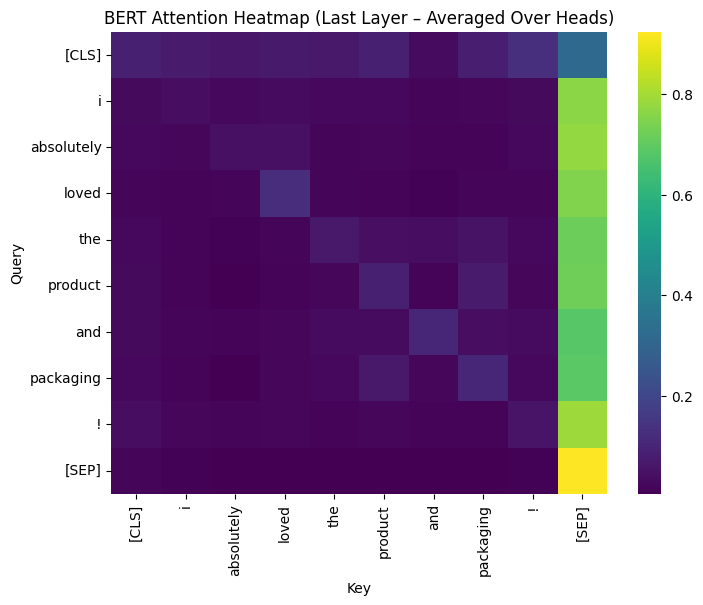

In [13]:
# BERT Attention Heatmap to Understand token interaction

# Load base BERT model to access attention
bert_base = TFBertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Pick a sentence to visualize
sentence = "I absolutely loved the product and packaging!"
tokens = bert_tokenizer.encode(sentence, return_tensors="tf")
outputs = bert_base(tokens)

# Get attention weights from last layer
attentions = outputs.attentions  # tuple of (layer, batch, head, seq_len, seq_len)
last_layer_attention = attentions[-1][0]  # shape: (num_heads, seq_len, seq_len)

# Average over all heads
avg_attention = tf.reduce_mean(last_layer_attention, axis=0).numpy()

# Decode tokens for labels
decoded_tokens = bert_tokenizer.convert_ids_to_tokens(tokens[0])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(avg_attention, xticklabels=decoded_tokens, yticklabels=decoded_tokens, cmap='viridis')
plt.title("BERT Attention Heatmap (Last Layer – Averaged Over Heads)")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


1/1 [==============================] - 0s 52ms/step


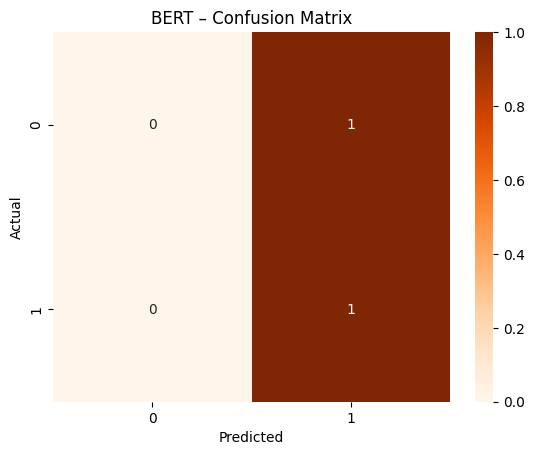

BERT – Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anjitha_Learning\Higher Studies\PGD\Git repo\ML-Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

In [14]:
# Predict with BERT
bert_preds = bert_model.predict(test_encodings['input_ids']).logits
bert_preds_binary = np.argmax(bert_preds, axis=1)

# BERT Confusion Matrix
bert_cm = confusion_matrix(y_test, bert_preds_binary)
sns.heatmap(bert_cm, annot=True, fmt='d', cmap='Oranges')
plt.title("BERT – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# BERT Classification Report
print("BERT – Classification Report")
print(classification_report(y_test, bert_preds_binary))


### Comparison: Naive Bayes vs. SVM vs. LSTM vs. BERT

C:\Users\AnjithaRAVIKUMAR\AppData\Local\Temp\ipykernel_32524\1148122572.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


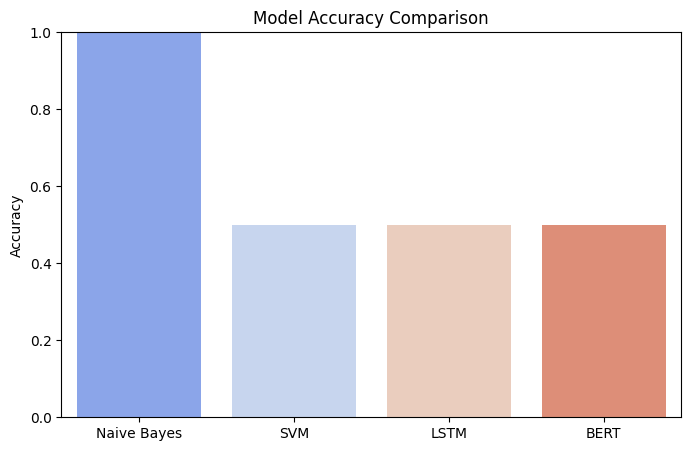

In [20]:
# Accuracy comparison

nb_acc = accuracy_score(y_test, nb_preds)
svm_acc = accuracy_score(y_test, svm_preds)
lstm_acc = accuracy_score(y_test, lstm_preds_binary)
bert_acc = accuracy_score(y_test, bert_preds_binary)

models = ['Naive Bayes', 'SVM', 'LSTM', 'BERT']
accuracies = [nb_acc, svm_acc, lstm_acc, bert_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


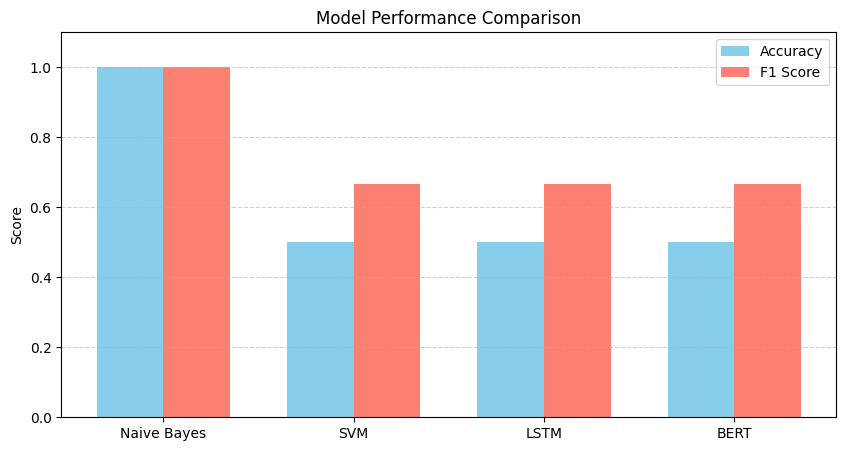

In [16]:
# Model Performance Comparison

from sklearn.metrics import f1_score

# F1 Scores
nb_f1 = f1_score(y_test, nb_preds)
svm_f1 = f1_score(y_test, svm_preds)
lstm_f1 = f1_score(y_test, lstm_preds_binary)
bert_f1 = f1_score(y_test, bert_preds_binary)

# Accuracy
model_names = ['Naive Bayes', 'SVM', 'LSTM', 'BERT']
accuracy_scores = [nb_acc, svm_acc, lstm_acc, accuracy_score(y_test, bert_preds_binary)]
f1_scores = [nb_f1, svm_f1, lstm_f1, bert_f1]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='salmon')
plt.xticks(x, model_names)
plt.ylim(0, 1.1)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
